### Assignment - 4
Below is the Assignment-4 image:

![Assignment-4 Screenshot](Assignment-4.png)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Step 1: Create a random dataset of 100 rows and 30 columns (values between 1–200)
# Create DataFrame
np.random.seed(42)  # for reproducibility
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f'Col_{i+1}' for i in range(30)])

# Display first few rows
df.head()

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_21,Col_22,Col_23,Col_24,Col_25,Col_26,Col_27,Col_28,Col_29,Col_30
0,103,180,93,15,107,72,189,21,103,122,...,88,158,38,130,192,188,21,161,58,22
1,89,49,59,170,188,15,190,190,175,190,...,18,132,89,60,14,9,90,53,130,84
2,92,111,188,199,172,8,175,35,81,164,...,146,44,162,190,14,95,48,15,200,190
3,40,82,111,53,24,154,188,124,41,157,...,139,81,136,163,163,33,123,5,41,28
4,135,72,12,162,33,48,151,62,37,99,...,103,27,137,15,90,42,124,179,63,96


In [3]:
# Step 2: Replace all values between [10, 60] with NaN (missing values)
df = df.mask((df >= 10) & (df <= 60), np.nan)

# Count of NAs in each row and each column
print("Count of NAs in each column:\n", df.isna().sum())
print("\nCount of NAs in each row:\n", df.isna().sum(axis=1))

Count of NAs in each column:
 Col_1     23
Col_2     22
Col_3     21
Col_4     18
Col_5     26
Col_6     28
Col_7     23
Col_8     27
Col_9     21
Col_10    17
Col_11    26
Col_12    24
Col_13    23
Col_14    28
Col_15    23
Col_16    34
Col_17    31
Col_18    31
Col_19    34
Col_20    20
Col_21    24
Col_22    26
Col_23    23
Col_24    31
Col_25    27
Col_26    26
Col_27    31
Col_28    27
Col_29    31
Col_30    31
dtype: int64

Count of NAs in each row:
 0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64


In [4]:
#Step 3: Replace all NaN values with the average of that column
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)

# Verify no NaNs remain
df.isna().sum().sum()

np.int64(0)

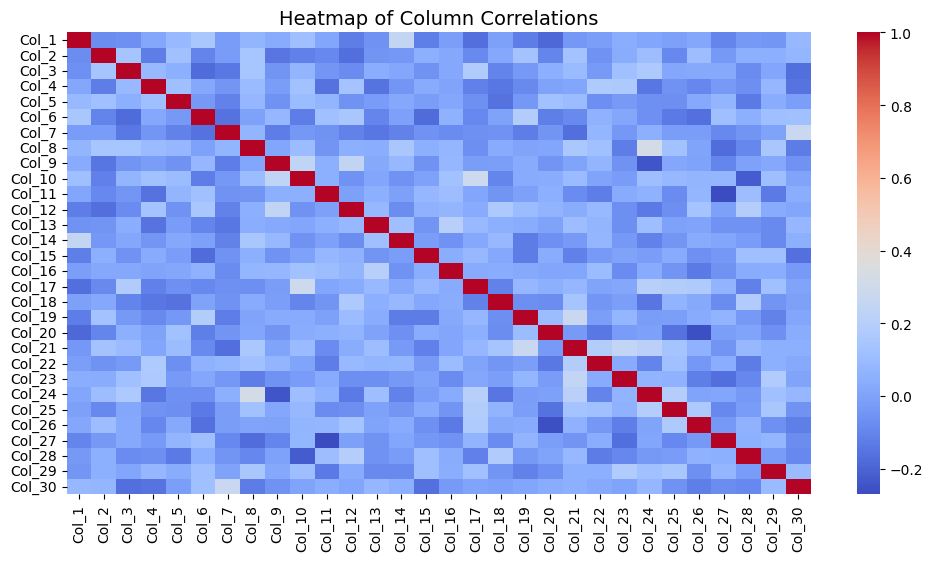

In [5]:
#Step 4: Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap of Column Correlations", fontsize=14)
plt.show()

### Explanation:
- The heatmap visualizes correlation between columns.
- The darker red/blue indicates high positive/negative correlation respectively.

In [7]:
#Step 5: Count number of columns having correlation ≤ 0.7
corr_matrix = df.corr()
low_corr_count = (corr_matrix.abs() <= 0.7).sum().sum() - len(df.columns)
print(f" Number of column pairs with correlation ≤ 0.7: {low_corr_count}")

 Number of column pairs with correlation ≤ 0.7: 840


### Explanation:
- We used abs() since correlation can be negative.
- We subtracted diagonal values (self-correlation = 1).

In [8]:
#Step 6: Normalize each column between 0 and 10
df_norm = (df - df.min()) / (df.max() - df.min()) * 10
df_norm.head()

,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_21,Col_22,Col_23,Col_24,Col_25,Col_26,Col_27,Col_28,Col_29,Col_30
0,5.102041,8.963731,4.595960,6.385415,5.329949,3.585859,9.641026,5.514559,5.179487,6.102564,...,4.416244,7.889447,6.161543,6.548223,9.639175,9.390863,6.073847,8.080808,5.849601,6.562815
1,4.387755,6.085426,5.457742,8.527919,9.441624,6.064113,9.692308,9.497487,8.871795,9.589744,...,6.317125,6.582915,4.336735,6.233355,6.158735,0.304569,4.472362,6.104193,6.428571,4.224599
2,4.540816,5.388601,9.393939,10.000000,8.629442,0.353535,8.923077,5.514559,4.051282,8.256410,...,7.360406,6.135407,8.061224,9.593909,6.158735,4.670051,6.073847,6.104193,10.000000,9.893048
3,6.485555,3.886010,5.505051,6.385415,6.031006,7.727273,9.589744,6.180905,6.233690,7.897436,...,7.005076,4.020101,6.734694,8.223350,8.144330,6.213472,6.130653,0.202020,5.849601,6.562815
4,6.734694,3.367876,5.457742,8.121827,6.031006,6.064113,7.692308,3.065327,6.233690,4.923077,...,5.177665,6.135407,6.785714,6.233355,4.381443,6.213472,6.180905,8.989899,3.010204,4.866310


### Explanation
- Normalization scales data to a given range (here [0, 10])

In [9]:
# Step 7: Replace all values with 0 if ≤ 5 else 1
df_binary = df_norm.applymap(lambda x: 0 if x <= 5 else 1)
df_binary.head()

/var/folders/1n/x245xykx2sx4q_wwsmp6qfn80000gn/T/ipykernel_7232/1735165411.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_norm.applymap(lambda x: 0 if x <= 5 else 1)


,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,...,Col_21,Col_22,Col_23,Col_24,Col_25,Col_26,Col_27,Col_28,Col_29,Col_30
0,1,1,0,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,0,1,1,0
2,0,1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
4,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,0,1,1,1,0,0


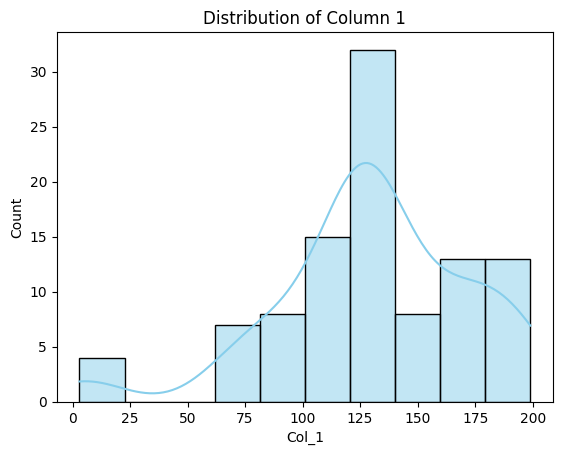

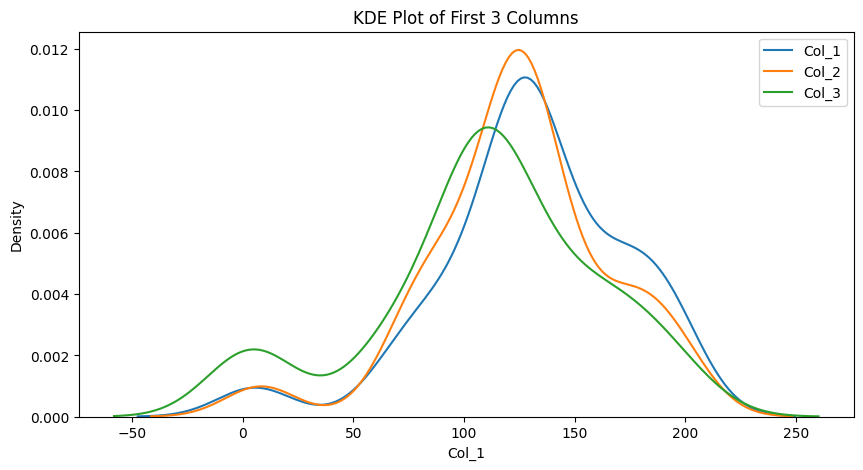

In [10]:
# Step 8: Visualize the distribution of a dataset (Seaborn Practice)
# Example 1: Distribution plot of one column
sns.histplot(df['Col_1'], kde=True, color='skyblue')
plt.title("Distribution of Column 1")
plt.show()

# Example 2: Multiple distribution comparison
plt.figure(figsize=(10, 5))
for i in range(3):
    sns.kdeplot(df.iloc[:, i], label=f'Col_{i+1}')
plt.legend()
plt.title("KDE Plot of First 3 Columns")
plt.show()